# Cryo-EM Ribosome Nearest Distance Neighbour Project

## 1. Introduction

We are interested in how viral infeciton influeces the normal biology of the cells. In this project, we used Cryo-EM to take pictures of human cells infected by polio virus. We specifically focused on the ribosome structure. In our cells, ribosomes can exist in different congregations. When one ribosome occupies a single RNA, it forms a monosome; and when a cluster of ribosomes come together on messenger RNA when translating, it forms a polysome structure. Here we want to exploit the high resolution power of Cryo-EM to analyze the conformational change of  ribosome after the cell was infected. 

In this notebook we present a branch of project, where we analyze the distances between ribosome particles. We want to have a closer look at the distribution pattern of the ribosome particles and try to explore whether viral infection will change the ribosome distribution or not.

## 2. Data used for this analysis

### Preprocessing the data

### Data Structure

Here we first define a function read_csfile(), which reads the input dataset and output the header and content.

In [13]:
import numpy as np
import seaborn as sns   # searborn is a convinient package for scientific plotting
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

In [14]:
def read_csfile(csfile):
    content = np.array(np.load(csfile).tolist())
    dtype   = np.load(csfile).dtype
    header = []
    for key in dtype.fields.keys():
        header.append(key)
    header = np.array(header)
    return header, content

In [15]:
particle_file = '/Users/Expo/Desktop/Cryo-EM/Project/cryoem-analysis-tools/data/P8_J60_passthrough_particles.cs'
header, content = read_csfile(particle_file)

The shape of the content array is (244798, 28), which means there are 244,798 data points represented as arrays in the content array, and each data point (array) has 28 elements. 

In [51]:
print(content.shape)

(193557, 28)


The header contains the information of how the data is organized in the content array. For example, we see the first element of every data point is the unique id, which is used to identify a specific group of micrographs. The information most relevant to us is the 'location/center_x_frac' and 'location/center_y_frac' element.

In [53]:
print(header)

['uid' 'location/micrograph_uid' 'location/exp_group_id'
 'location/micrograph_path' 'location/micrograph_shape'
 'location/center_x_frac' 'location/center_y_frac' 'pick_stats/ncc_score'
 'pick_stats/power' 'pick_stats/template_idx' 'pick_stats/angle_rad'
 'ctf/type' 'ctf/exp_group_id' 'ctf/accel_kv' 'ctf/cs_mm'
 'ctf/amp_contrast' 'ctf/df1_A' 'ctf/df2_A' 'ctf/df_angle_rad'
 'ctf/phase_shift_rad' 'ctf/scale' 'ctf/scale_const' 'ctf/shift_A'
 'ctf/tilt_A' 'ctf/trefoil_A' 'ctf/tetra_A' 'ctf/anisomag' 'ctf/bfactor']


In [56]:
print(content[:10,1])

[2325032373660092106 2325032373660092106 2325032373660092106
 2325032373660092106 2325032373660092106 2325032373660092106
 2325032373660092106 2325032373660092106 2325032373660092106
 2325032373660092106]


### TODO: An introduction to the meaning of a micrograph and how one single micrograph is generate from the whole dataset.

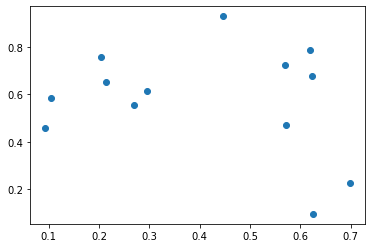

In [18]:
mic1 = np.where(content[:,1]==content[0,1])
plt.scatter(content[mic1,5],content[mic1,6])
plt.show()

## 3. Implementation

### Introduction to the implementation

In [21]:
# Using sklearn.metrics.pairwise.euclidean_distances function
def findMinDistance(mic, min_distance):
    loc = list(zip(content[mic,5][0], content[mic,6][0]))
    distances = euclidean_distances(loc, loc)

    for x in distances:
        minval = np.min(x[np.nonzero(x)])
        min_distance.append(minval)

In [22]:
def processContent(content):
    min_distance = []
    # Find the unique ID of the pictures
    uniqID = np.unique(content[:,1])

    for i in uniqID:
        mic = np.where(content[:,1]==i)
        if(mic[0].shape[0]>1):
            findMinDistance(mic, min_distance)
            
    return min_distance

In [23]:
particle_file = ['/Users/Expo/Desktop/Cryo-EM/Project/cryoem-analysis-tools/data/P5_J67_passthrough_particles.cs',
                '/Users/Expo/Desktop/Cryo-EM/Project/cryoem-analysis-tools/data/P8_J60_passthrough_particles.cs',
                '/Users/Expo/Desktop/Cryo-EM/Project/cryoem-analysis-tools/data/P15_J35_passthrough_particles.cs']

In [32]:
min_distances = []

for file in particle_file:
    header, content = read_csfile(file)
    min_distances.append(np.asarray(processContent(content)))

## 4. Analyze result

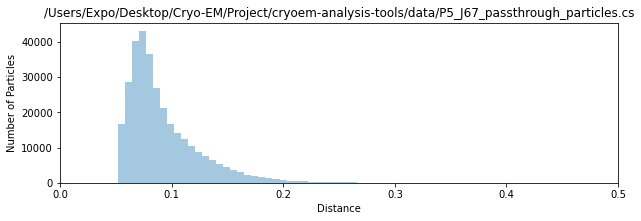

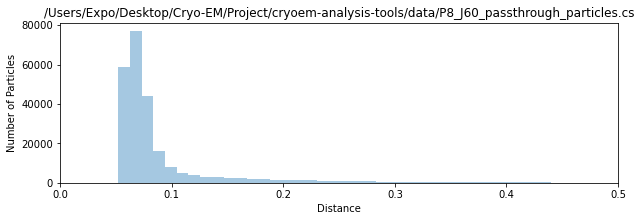

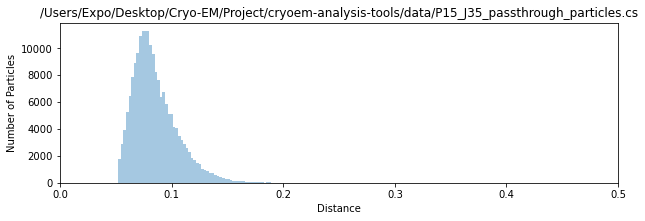

In [50]:
for i in range(1,4):
    plt.figure(figsize=(10,10))
    plt.subplot(3,1,i)
    sns.distplot(min_distances[i-1], hist=True, kde = False, bins = 100).set_title(particle_file[i-1]);
    plt.xlim(0, 0.5)
    plt.xlabel('Distance')
    plt.ylabel('Number of Particles')
    plt.show()